<img src="data/imagen2.png" alt="Drawing" style="width: 1100px;"/>

# EXERCISE
# Supervised Learning: Classification.

## *Binary electricity price classification in the Day-Ahead Spot Market*

**Objective:** Imagining that we are in the middle of 2020, predict in which hours the price of electricity in the Day-Ahead Market will be high, being **class 0** for values lower than 40 €, and **class 1** for values higher than 40 €.  We will use the context and historical data for **2020** of the target variable we want to classify and other features that can help to predict the model.

### Before you start:

* In the file **EJ2-data-prices.xlsx** is the input dataset for this example (attributes + label). 
* Data from January 2, 2020 to June 26, 2020.


## **Import libraries and data**


In [1]:

import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the input dataset
df = pd.read_csv('dataset-milp.csv')

ModuleNotFoundError: No module named 'sklearn'

## **2. Understanding the data**

It is necessary to visualize and understand the data we are going to work with, as well as to know its characteristics. 

1. How much data is there? How many attributes are there in the data?  
2. What do they mean?
3. Is there any missing data? 
4. Are the labels balanced? 
5. Statistical summary of the input data set.

1. **How much data is there? How many attributes are there in the data?**

In [10]:
# Data rows/columns
### your code here
df.columns

Index(['hora', 'dia', 'mes', 'hidraul', 'eolica', 'demanda', 'ciclocomb',
       'cogener', 'nuclear', 'carbon', 'biomas', 'precio-elect-dia-anterior',
       'MIBGAS-dia-anterior', 'precio'],
      dtype='object')

In [11]:
df.shape

(4223, 14)

In [12]:
# Look at the first 5 rows of the data
### your code here
df.head()

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior,precio
0,0,2,1,5221.1,1639.0,13290.5,2500.5,2493.8,7093.6,430.0,270,41.88,11.27,menor que 40 euros
1,1,2,1,4928.5,1568.4,12720.1,2411.5,2447.8,7091.6,430.0,243,38.60,11.27,menor que 40 euros
2,2,2,1,4860.3,1566.3,12558.6,2307.5,2446.6,7092.6,417.0,362,36.55,11.27,menor que 40 euros
3,3,2,1,4980.8,1781.5,12837.5,2307.5,2436.7,7092.6,387.0,369,32.32,11.27,menor que 40 euros
4,4,2,1,4984.3,1998.2,13100.9,2374.2,2448.3,7094.6,387.0,413,30.85,11.27,menor que 40 euros


**2. What do they mean?** 

***[Time, Day, Month]*** Time, day and month of each of the observations. They are integer values *int64*.

***[Hydro, Wind, Cyclocomb, Cogener, Nuclear, Coal, Biomass]*** refers to the hourly scheduled energy of the PVP program in the daily market by type of production of the previous day.  These are actual *float* values.

***[Demand]*** is the total scheduled energy in the daily electricity market in Spain on the previous day.  These are real *float* values.

***[price-elect-day-previous-day]*** price of electricity on the previous day. These are actual *float* values.

***[MIBGAS-previous-day]*** day-ahead natural gas price. These are actual *float* values.

***[Classes]*** are the price tags we want to predict.




In [13]:
# Data format
### your code here
df.dtypes

hora                           int64
dia                            int64
mes                            int64
hidraul                      float64
eolica                       float64
demanda                      float64
ciclocomb                    float64
cogener                      float64
nuclear                      float64
carbon                       float64
biomas                         int64
precio-elect-dia-anterior    float64
MIBGAS-dia-anterior          float64
precio                        object
dtype: object

**3. Is any data missing? If so, please indicate how many and in which attribute**. 



In [14]:
### your code here
df.isnull().values.any() # True => valeurs manquantes

True

In [15]:
df.isnull().sum()

hora                         0
dia                          0
mes                          0
hidraul                      0
eolica                       0
demanda                      3
ciclocomb                    0
cogener                      0
nuclear                      0
carbon                       3
biomas                       0
precio-elect-dia-anterior    0
MIBGAS-dia-anterior          0
precio                       0
dtype: int64

**4. ¿Are the targets balanced?** 

In [16]:
balance_clases = df['precio'].value_counts()
print(balance_clases)

precio
menor que  40 euros    3507
mayor que  40 euros     716
Name: count, dtype: int64


precio-elect-dia-anterior
25.00    41
23.00    31
15.00    29
30.00    25
18.00    22
         ..
57.01     1
56.70     1
53.57     1
26.56     1
40.24     1
Name: count, Length: 1972, dtype: int64


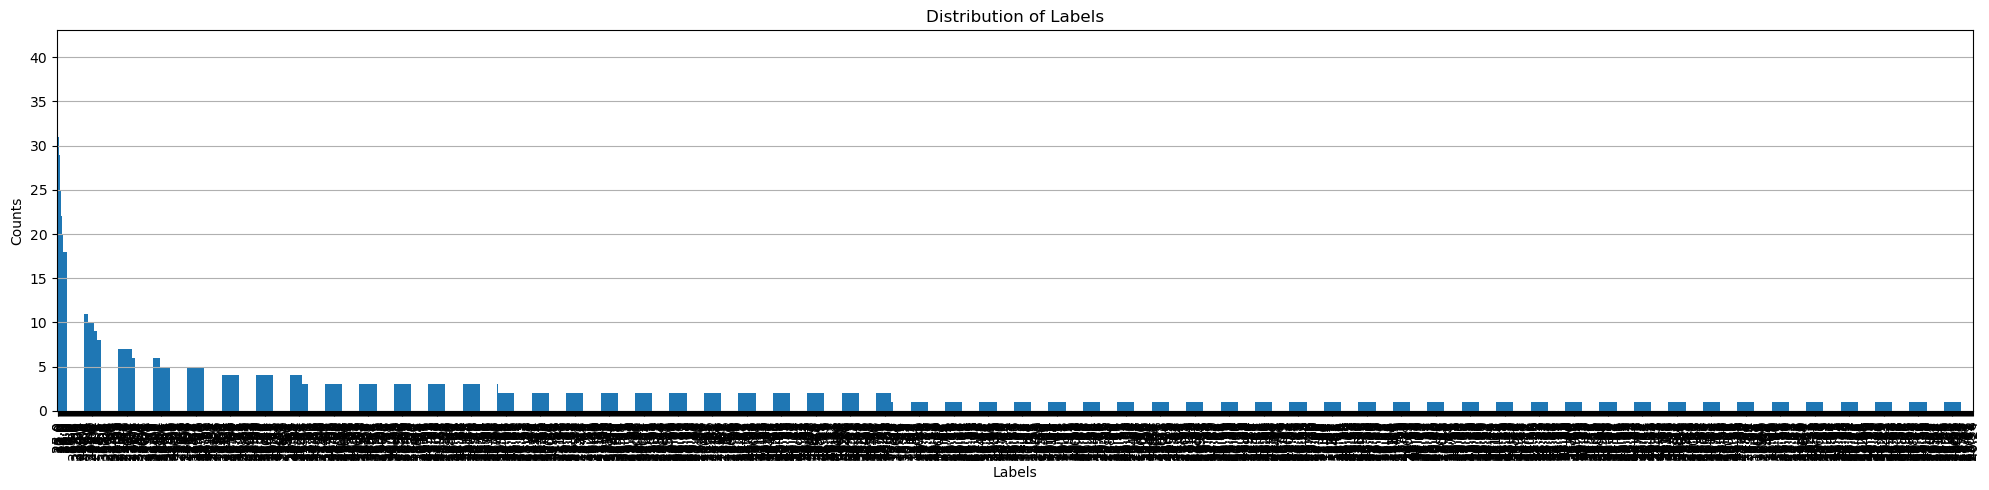

In [17]:
# Check if the labels are unbalanced
### your code here
balance_clases = df['precio-elect-dia-anterior'].value_counts()
print(balance_clases)

# Class balance graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
balance_clases.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.xticks(rotation=90)  # Rotate x-labels for better visibility if needed
plt.grid(axis='y')  # Add gridlines on the y-axis
plt.tight_layout()
plt.show()


**5. Summary statistics of the input data set:** 

Descriptive statistics collects and analyzes the input data set with the objective of describing the characteristics and behaviors of this set through the following summary measures: total number of observations (count), mean (mean), standard deviation (std), minimum value (min), maximum value (max) and the values of the different quartiles (25%, 50%, 75%).


In [18]:
# Statistical data for each attribute
### your code here
df.describe()

#mean_value = df['column_name'].mean()
#std_dev = df['column_name'].std()
#min_value = df['column_name'].min()
#max_value = df['column_name'].max()
#quantiles = df['column_name'].quantile([0.25, 0.5, 0.75])

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior
count,4223.000000,4223.000000,4223.000000,4223.000000,4223.000000,4220.000000,4223.000000,4223.000000,4223.000000,4220.000000,4223.000000,4223.000000,4223.000000
mean,11.502250,15.411556,3.443287,3090.683495,6142.901373,20223.538578,2337.097135,3059.788942,6019.210466,674.060308,374.144684,28.813694,8.288518
std,6.922282,8.598094,1.674775,1398.795645,3488.275912,3945.242127,1488.503359,282.994453,1212.068728,444.206117,102.061931,10.929161,2.347374
min,0.000000,1.000000,1.000000,856.600000,614.400000,0.000000,460.000000,1825.500000,3410.200000,0.000000,197.000000,1.020000,4.170000
25%,6.000000,8.000000,2.000000,1924.150000,3447.650000,17123.000000,1255.600000,2909.150000,4886.200000,413.000000,287.000000,21.080000,6.040000
50%,12.000000,15.000000,3.000000,2760.400000,5394.900000,20094.500000,1962.600000,3089.300000,6730.500000,530.000000,373.000000,28.410000,8.180000
75%,17.500000,23.000000,5.000000,4126.450000,8229.350000,22871.725000,2893.350000,3238.150000,7089.500000,973.000000,462.000000,36.670000,9.975000
max,23.000000,31.000000,6.000000,7411.900000,18996.300000,35458.900000,9078.400000,3696.800000,7100.500000,2065.000000,551.000000,62.480000,14.480000


## **3. Visualize the data**.

A visual way to understand the input data. 
1. Histogram
2. Density curve
3. Boxplots
4. Correlation matrix


**1. Histogram**

Graphical representation of each of the attributes in the form of bars, where the surface of the bar is proportional to the frequency of the values represented.

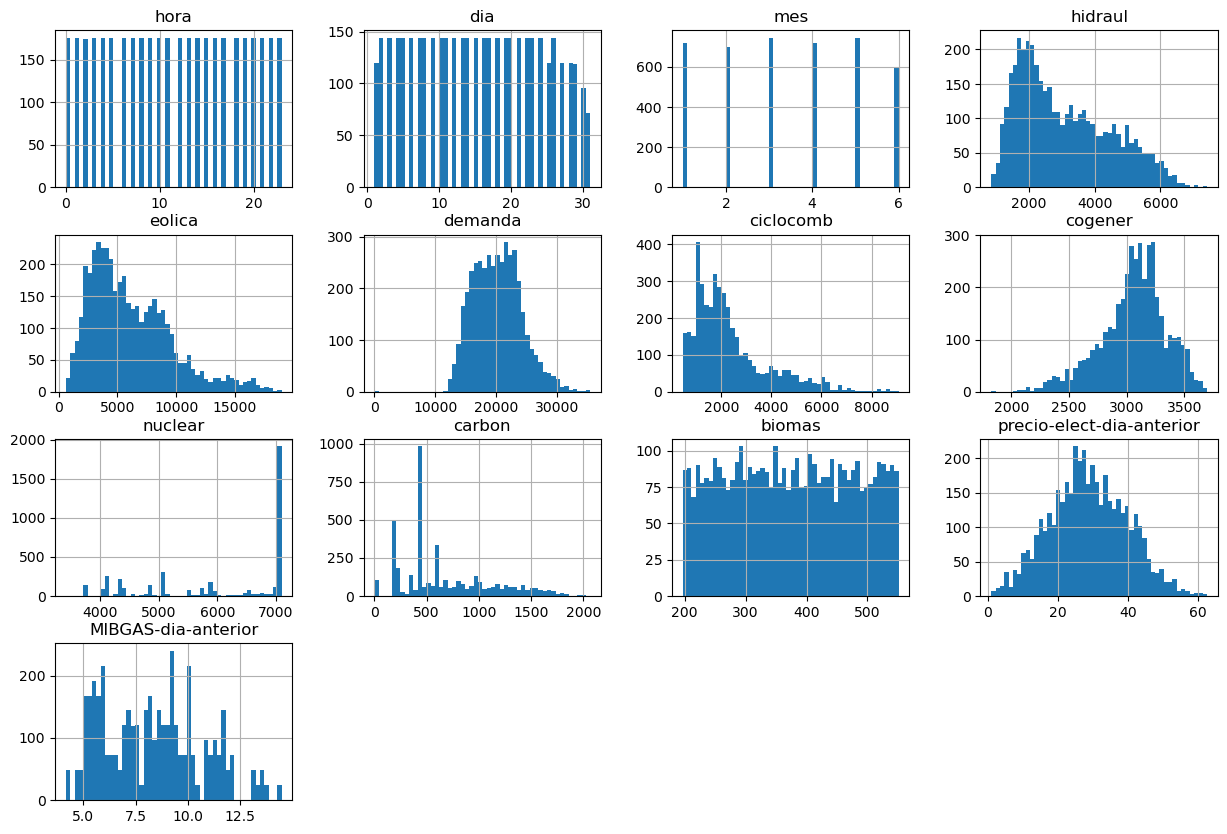

In [19]:
histogram = df.hist(xlabelsize=10, ylabelsize=10, bins=50, figsize=(15, 10))

**2. Density graph**.

Visualizes the distribution of the data. It is a variable of the histogram, but removes noise, so they are better for determining the distribution shape of an attribute. Density plot spikes help show where values are most concentrated. 

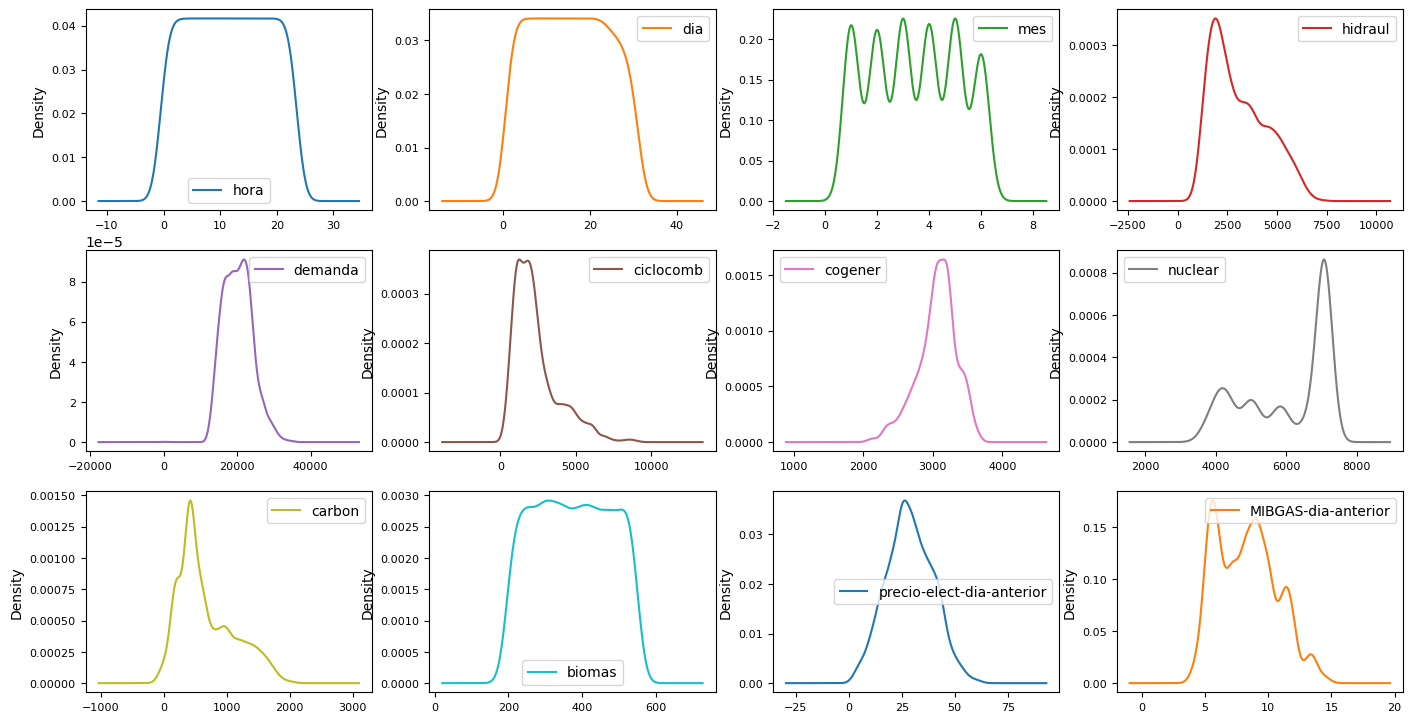

In [20]:
density = df.plot(kind='kde', x=4, subplots=True, legend=True, layout=(4, 4), figsize=(17, 12), sharex=False,
                        fontsize=8, stacked=True) 

**3. Boxplots** 

The boxplot allows us to identify outliers and compare distributions. In addition, we know how 50% of the values are distributed (within the box).

* Which attribute is striking because of its outliers? 

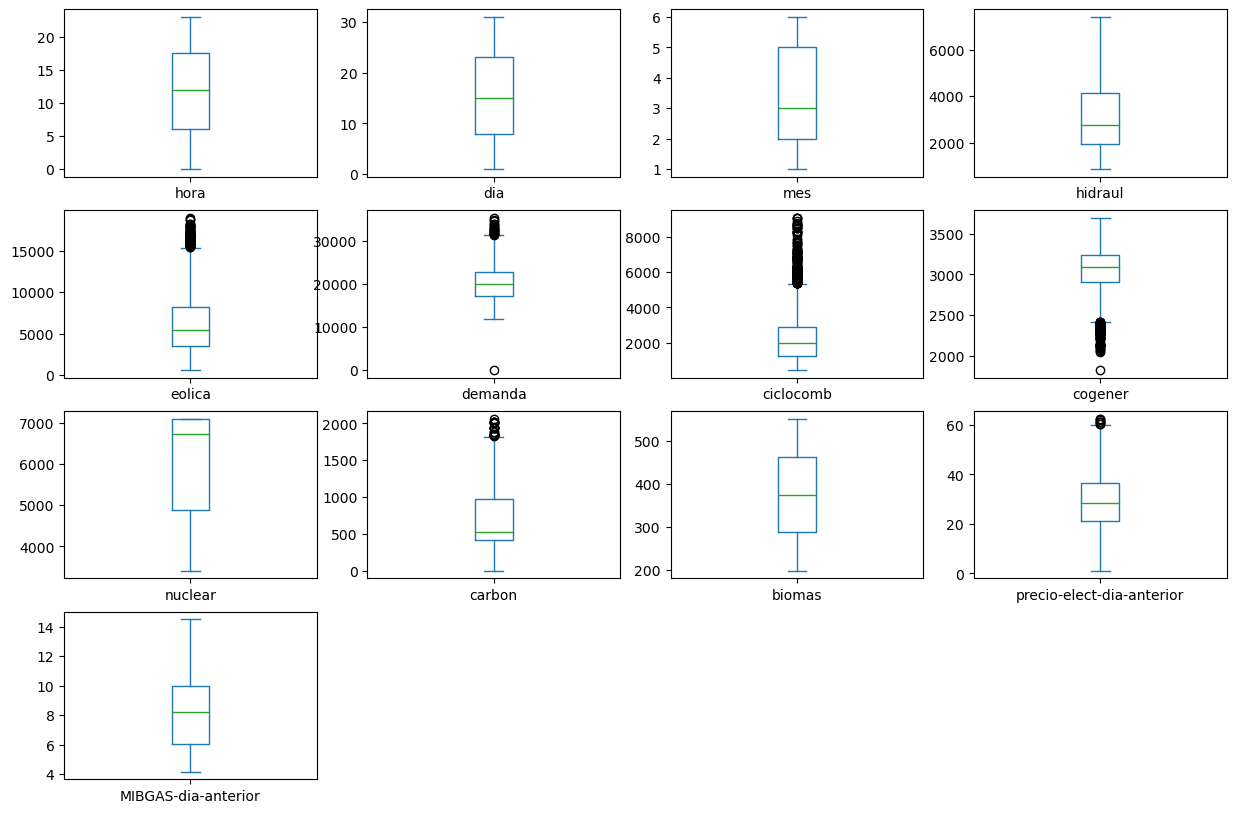

In [21]:
atributs_boxplot = df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False,
                                 sharey=False, fontsize=10)

**4. Correlation matrix**. 
We use Spearman's method to evaluate the monotonic relationship between two continuous variables. 

Comparison between [Pearson y Spearman]

[Pearson y Spearman]: https://support.minitab.com/es-mx/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/


* **Which variable has no correlation with any attribute?** 

In [22]:
#  Other data visualization library: seaborn
import seaborn as sns

# Calculation of correlation coefficients
### your code here
corr_matrix = df.corr(method='spearman')

# Créez une heatmap pour visualiser les corrélations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélation de Spearman entre les variables')
plt.show()


ValueError: could not convert string to float: 'menor que  40 euros'

In [23]:
# Remove repeated values
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 12))

#Generate Heat Map,
sns.heatmap(corr_matrix, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns);
    # yticks
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    # plot
plt.show()

NameError: name 'corr_matrix' is not defined

We cannot see the correlation with the price, we must pass it to numeric *LabelEncoder*.

In [24]:
from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder() 
lab_encoder.fit(df['precio'])  
print(lab_encoder.classes_)  # Shows the different classes that exist

df['precio'] = lab_encoder.transform(df['precio'])
print(df)

['mayor que  40 euros' 'menor que  40 euros']
      hora  dia  mes  hidraul  eolica  demanda  ciclocomb  cogener  nuclear  \
0        0    2    1   5221.1  1639.0  13290.5     2500.5   2493.8   7093.6   
1        1    2    1   4928.5  1568.4  12720.1     2411.5   2447.8   7091.6   
2        2    2    1   4860.3  1566.3  12558.6     2307.5   2446.6   7092.6   
3        3    2    1   4980.8  1781.5  12837.5     2307.5   2436.7   7092.6   
4        4    2    1   4984.3  1998.2  13100.9     2374.2   2448.3   7094.6   
...    ...  ...  ...      ...     ...      ...        ...      ...      ...   
4218    19   26    6   4230.5  3680.1  29267.6     7090.4   3200.0   5061.4   
4219    20   26    6   4479.3  3828.2  29025.5     7130.7   3203.2   5063.4   
4220    21   26    6   3800.5  3712.7  29266.4     6764.1   3217.7   5062.4   
4221    22   26    6   3529.7  3780.1  28711.2     6745.1   3215.0   5064.4   
4222    23   26    6   2650.6  3676.9  26581.4     6650.9   3209.0   5065.4   

     

In [25]:
# replace column values 0 with 1 and 1 with 0
### your code here
df['precio'] = df['precio'].replace({1: 0, 0: 1})
print(df)

      hora  dia  mes  hidraul  eolica  demanda  ciclocomb  cogener  nuclear  \
0        0    2    1   5221.1  1639.0  13290.5     2500.5   2493.8   7093.6   
1        1    2    1   4928.5  1568.4  12720.1     2411.5   2447.8   7091.6   
2        2    2    1   4860.3  1566.3  12558.6     2307.5   2446.6   7092.6   
3        3    2    1   4980.8  1781.5  12837.5     2307.5   2436.7   7092.6   
4        4    2    1   4984.3  1998.2  13100.9     2374.2   2448.3   7094.6   
...    ...  ...  ...      ...     ...      ...        ...      ...      ...   
4218    19   26    6   4230.5  3680.1  29267.6     7090.4   3200.0   5061.4   
4219    20   26    6   4479.3  3828.2  29025.5     7130.7   3203.2   5063.4   
4220    21   26    6   3800.5  3712.7  29266.4     6764.1   3217.7   5062.4   
4221    22   26    6   3529.7  3780.1  28711.2     6745.1   3215.0   5064.4   
4222    23   26    6   2650.6  3676.9  26581.4     6650.9   3209.0   5065.4   

      carbon  biomas  precio-elect-dia-anterior  MI

In [26]:
# Show the first 10 rows of the dataset
### your code here
df.head(10)

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior,precio
0,0,2,1,5221.1,1639.0,13290.5,2500.5,2493.8,7093.6,430.0,270,41.88,11.27,0
1,1,2,1,4928.5,1568.4,12720.1,2411.5,2447.8,7091.6,430.0,243,38.60,11.27,0
2,2,2,1,4860.3,1566.3,12558.6,2307.5,2446.6,7092.6,417.0,362,36.55,11.27,0
3,3,2,1,4980.8,1781.5,12837.5,2307.5,2436.7,7092.6,387.0,369,32.32,11.27,0
4,4,2,1,4984.3,1998.2,13100.9,2374.2,2448.3,7094.6,387.0,413,30.85,11.27,0
5,5,2,1,4984.9,1939.2,13178.2,2340.9,2443.6,7094.6,387.0,481,30.14,11.27,0
6,6,2,1,5000.9,1941.5,13274.3,2340.9,2471.2,7093.6,387.0,445,30.17,11.27,0
7,7,2,1,5017.1,1913.8,13248.3,2345.1,2480.7,7094.6,387.0,354,30.00,11.27,1
8,8,2,1,5260.7,1704.3,13628.5,2307.5,2473.1,7093.6,387.0,477,30.65,11.27,1
9,9,2,1,5330.8,1539.4,14256.6,2307.5,2491.2,7093.6,387.0,450,30.65,11.27,1


#### We show again the correlation matrix with the value of the price [1 (very high), 0 (normal)]


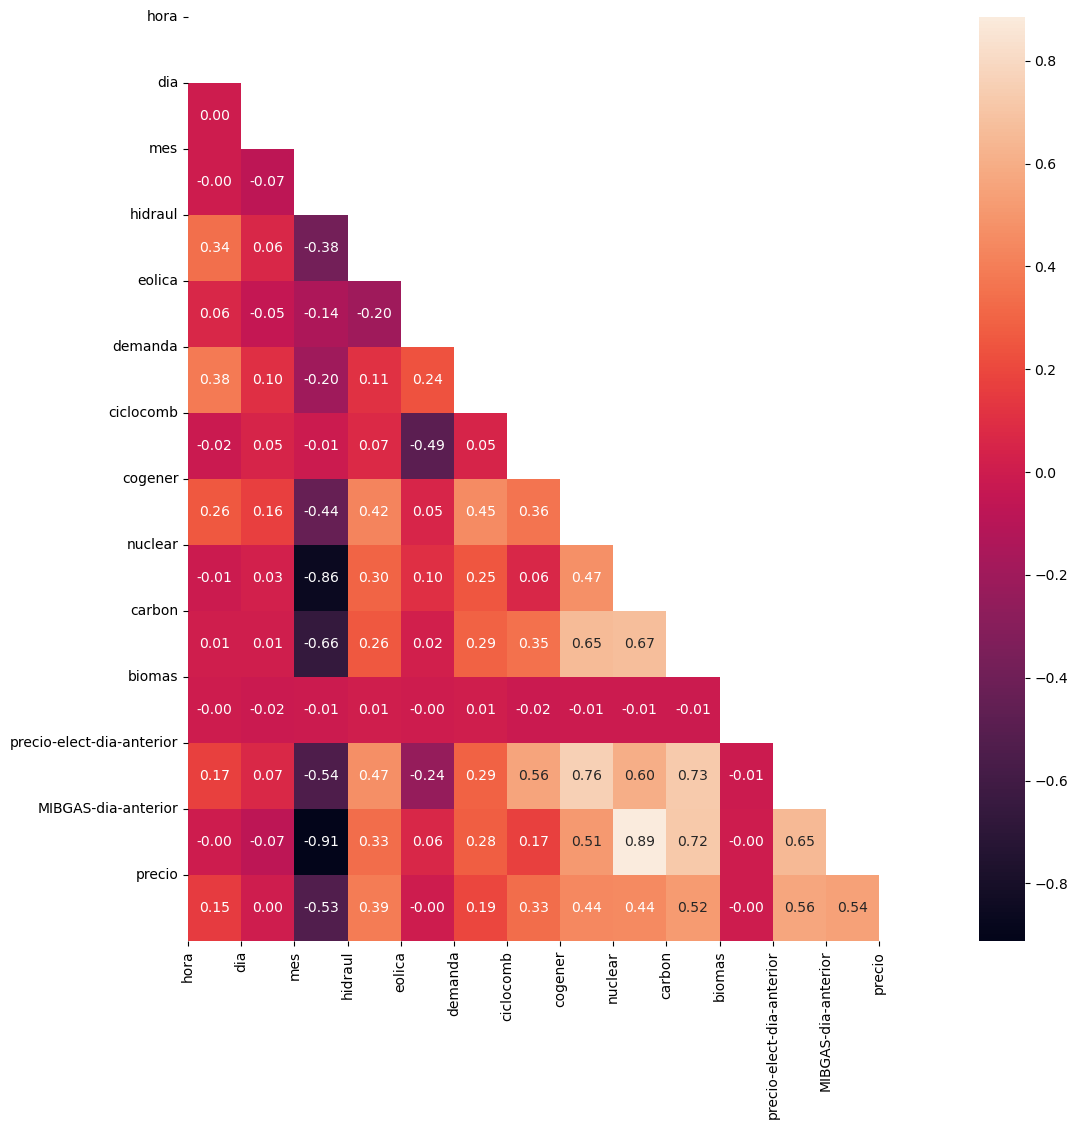

In [27]:
# Calculation of correlation coefficients

### your code here
corr_matrix = df.corr(method='spearman')
# Remove repeated values
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

  
f, ax = plt.subplots(figsize=(12, 12))
#Generate Heat Map,
sns.heatmap(corr_matrix, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns);
    # yticks
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    # plot
plt.show()

## *4. Prepare the data*.

1. Missing data
2. Data cleaning (remove outliers).
3. LabelEncoding (we have already done it).
4. Feature engineering
5. Transformation.

First, I divide the data into **attributes**: X (features) and **tags**: y (target).

In [28]:
# Atributes X (features); labels y (target)
### your code here
X = df.drop(columns=['precio'])  # Dropping the 'precio' column to keep the rest as attributes
y = df['precio']  # Selecting only the 'precio' column as the target

print(f"Attributes (X) Shape: {X.shape}")
print(f"Target (y) Shape: {y.shape}")

Attributes (X) Shape: (4223, 13)
Target (y) Shape: (4223,)


**Missing data**

Check whether Nan exists in the input data.

- The following method is used [fillna] from Pandas.

- Learn more about how to allocate values with [Scikit Learn]

[Scikit Learn]: https://scikit-learn.org/stable/modules/impute.html
[fillna]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html





In [29]:
# Check for missing data in attributes
### your code here
nan_values = X.isnull().values.any()
if nan_values:
    print("There are NaN values in the input data.")
else:
    print("There are no NaN values in the input data.")

There are NaN values in the input data.


In [30]:
# Fill the missing values of each attribute with the previous value of the attribute. 
### your code here
X.fillna(method='ffill', inplace=True)

In [31]:
# Check for missing data in the target
### your code here
nan_values_y = y.isnull().values.any()
if nan_values_y:
    print("There are NaN values in the input data.")
else:
    print("There are no NaN values in the input data.")

There are no NaN values in the input data.


In [32]:
# Check that no value is missing

### your code here
missing_values = X.isnull().any().any()

if not missing_values:
    print("No missing values present after forward-fill.")
else:
    print("There are still missing values in the DataFrame.")

No missing values present after forward-fill.


In [33]:
# Check that no value is missing

### your code here
missing_values_y = y.isnull().any().any()

if not missing_values_y:
    print("No missing values present after forward-fill.")
else:
    print("There are still missing values in the DataFrame.")

No missing values present after forward-fill.


**3. Feature engineering**

Using the correlation matrix, eliminate the attributes with a correlation close to 0 with the **"price"** tag. 

**Which attribute(s) are eliminated?**

In [34]:
# Delete the attribute
### your code here
correlation_matrix = df.corr()

# Get correlations with 'price' tag
price_correlations = correlation_matrix['precio']
print(price_correlations)

hora                         0.154760
dia                          0.002593
mes                         -0.528494
hidraul                      0.419927
eolica                       0.000441
demanda                      0.167076
ciclocomb                    0.372094
cogener                      0.422758
nuclear                      0.387671
carbon                       0.575319
biomas                      -0.003263
precio-elect-dia-anterior    0.587296
MIBGAS-dia-anterior          0.564956
precio                       1.000000
Name: precio, dtype: float64


In [35]:
threshold = 0.1  

# Select attributes with a correlation close to zero with 'price'
attributes_to_drop = price_correlations[abs(price_correlations) < threshold].index.tolist()
print(attributes_to_drop)


['dia', 'eolica', 'biomas']


In [36]:
X

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior
0,0,2,1,5221.1,1639.0,13290.5,2500.5,2493.8,7093.6,430.0,270,41.88,11.27
1,1,2,1,4928.5,1568.4,12720.1,2411.5,2447.8,7091.6,430.0,243,38.60,11.27
2,2,2,1,4860.3,1566.3,12558.6,2307.5,2446.6,7092.6,417.0,362,36.55,11.27
3,3,2,1,4980.8,1781.5,12837.5,2307.5,2436.7,7092.6,387.0,369,32.32,11.27
4,4,2,1,4984.3,1998.2,13100.9,2374.2,2448.3,7094.6,387.0,413,30.85,11.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,19,26,6,4230.5,3680.1,29267.6,7090.4,3200.0,5061.4,946.0,365,40.44,7.28
4219,20,26,6,4479.3,3828.2,29025.5,7130.7,3203.2,5063.4,946.0,453,41.23,7.28
4220,21,26,6,3800.5,3712.7,29266.4,6764.1,3217.7,5062.4,946.0,362,40.24,7.28
4221,22,26,6,3529.7,3780.1,28711.2,6745.1,3215.0,5064.4,946.0,424,40.10,7.28


In [37]:
# Drop the selected attributes from the DataFrame
X = X.drop(attributes_to_drop, axis=1)

In [38]:
X

,hora,mes,hidraul,demanda,ciclocomb,cogener,nuclear,carbon,precio-elect-dia-anterior,MIBGAS-dia-anterior
0,0,1,5221.1,13290.5,2500.5,2493.8,7093.6,430.0,41.88,11.27
1,1,1,4928.5,12720.1,2411.5,2447.8,7091.6,430.0,38.60,11.27
2,2,1,4860.3,12558.6,2307.5,2446.6,7092.6,417.0,36.55,11.27
3,3,1,4980.8,12837.5,2307.5,2436.7,7092.6,387.0,32.32,11.27
4,4,1,4984.3,13100.9,2374.2,2448.3,7094.6,387.0,30.85,11.27
...,...,...,...,...,...,...,...,...,...,...
4218,19,6,4230.5,29267.6,7090.4,3200.0,5061.4,946.0,40.44,7.28
4219,20,6,4479.3,29025.5,7130.7,3203.2,5063.4,946.0,41.23,7.28
4220,21,6,3800.5,29266.4,6764.1,3217.7,5062.4,946.0,40.24,7.28
4221,22,6,3529.7,28711.2,6745.1,3215.0,5064.4,946.0,40.10,7.28


## *5. Split data*
 

In [39]:
from sklearn.model_selection import train_test_split

test_size = 0.2  # percentage of the input data that you will use to validate the model

### your code here

# Diviser les données en ensembles d'entraînement et de test (80% pour l'entraînement et 20% pour les tests)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,hora,mes,hidraul,demanda,ciclocomb,cogener,nuclear,carbon,precio-elect-dia-anterior,MIBGAS-dia-anterior
2510,15,4,1759.2,23379.0,1416.3,3025.8,6416.1,243.0,17.50,8.60
1189,13,2,3399.7,25108.7,5509.9,3420.3,7087.0,1350.0,42.69,11.12
2591,0,4,4786.5,15424.3,1981.7,2665.1,5907.5,432.0,22.10,7.06
1647,15,3,3210.5,23616.8,736.0,3200.8,7091.0,1231.2,32.02,9.25
3925,14,6,1569.6,23593.8,906.2,3147.9,4865.0,470.0,17.71,5.21
...,...,...,...,...,...,...,...,...,...,...
3444,13,5,1840.5,22523.8,1521.5,2951.6,4079.9,423.0,19.60,4.23
466,10,1,4531.7,27731.3,1255.6,3386.0,7098.8,1287.0,42.01,11.48
3092,21,5,6063.9,17194.8,1033.9,3067.9,4354.9,423.0,25.06,5.35
3772,5,6,1644.9,12454.0,2455.0,2818.9,5070.3,413.0,32.56,5.46


**4. Transformation (scaling, if neccesary)**. 

* **Scale the data using the *MinMaxScaler()* method within the range [0,1].**

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = X.copy()
X_scaled = pd.DataFrame(scaler.fit_transform(df_scaled))
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.0,0.665797,0.374814,0.236761,0.357131,0.998130,0.208232,0.664823,0.688652
1,0.043478,0.0,0.621162,0.358728,0.226434,0.332550,0.997588,0.208232,0.611455,0.688652
2,0.086957,0.0,0.610758,0.354173,0.214367,0.331908,0.997859,0.201937,0.578100,0.688652
3,0.130435,0.0,0.629140,0.362039,0.214367,0.326618,0.997859,0.187409,0.509274,0.688652
4,0.173913,0.0,0.629674,0.369467,0.222106,0.332817,0.998401,0.187409,0.485356,0.688652


In [41]:
X_scaled.columns = df_scaled.columns
#df_scaled.columns
X_scaled.head()

,hora,mes,hidraul,demanda,ciclocomb,cogener,nuclear,carbon,precio-elect-dia-anterior,MIBGAS-dia-anterior
0,0.000000,0.0,0.665797,0.374814,0.236761,0.357131,0.998130,0.208232,0.664823,0.688652
1,0.043478,0.0,0.621162,0.358728,0.226434,0.332550,0.997588,0.208232,0.611455,0.688652
2,0.086957,0.0,0.610758,0.354173,0.214367,0.331908,0.997859,0.201937,0.578100,0.688652
3,0.130435,0.0,0.629140,0.362039,0.214367,0.326618,0.997859,0.187409,0.509274,0.688652
4,0.173913,0.0,0.629674,0.369467,0.222106,0.332817,0.998401,0.187409,0.485356,0.688652


## *6.  Model building and evaluation*

* Select **[balanced_accuracy]** as evaluation metric. 
* Evaluation metrics available in [Scikit-Learn].


[Scikit-Learn]: https://scikit-learn.org/stable/modules/model_evaluation.html

[balanced_accuracy]: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

* Remember to always use the same random_state to be able to compare results. 

In [42]:
!pip install xgboost

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

num_folds = 15
error_metrics = {'balanced_accuracy'}
models = { ('LR', LogisticRegression(solver='saga')), 
        ### your code here   
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('MLP', MLPClassifier()),
          ('XGB', xgb.XGBClassifier())
        }
results = [] # stores the results of the evaluation metrics
names = [] # name of each algorithm
msg = [] # print the summary of the cross-validation method


* Which one obtains better results? 
* Which balanced_accuracy do you get? 

Evaluation metrics:  balanced_accuracy
Model  RF
Model  MLP
Model  LR


C:\Users\romai\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\romai\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\romai\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\romai\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\romai\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\romai\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Model  XGB
Model  KNN
[('RF', 0.885626913641098, 0.04504965018082772), ('MLP', 0.720550515054061, 0.11871036434555379), ('LR', 0.7584779561729916, 0.045615282392761386), ('XGB', 0.8984841477749279, 0.03321320482825609), ('KNN', 0.7847731216525544, 0.041038153570570085)]


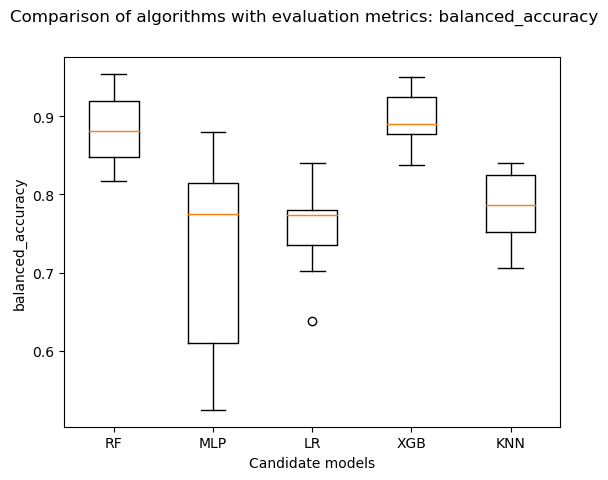

In [44]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Cross-validation training
for scoring in error_metrics:
    print('Evaluation metrics: ', scoring)
    for name, model in models:
        print('Model ', name)
        cross_validation = StratifiedKFold(n_splits=num_folds, random_state=0, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Compare results between algorithms
    fig = plt.figure()
    fig.suptitle('Comparison of algorithms with evaluation metrics: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Candidate models')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    results = []


In [45]:
print("la balanced_accuracy tient compte du déséquilibre de classe en donnant à chaque classe un poids égal dans le calcul.")
print("The model with the highest balanced_accuracy would be considered as performing better in terms of this evaluation metric.")
print("So, XGB seems to perform better in terms of this evaluation metric")

la balanced_accuracy tient compte du déséquilibre de classe en donnant à chaque classe un poids égal dans le calcul.
The model with the highest balanced_accuracy would be considered as performing better in terms of this evaluation metric.
So, XGB seems to perform better in terms of this evaluation metric


## *7. Adjust hyperparameters*.

Steps to perform the hyperadjustment of the parameters:

* Metric to optimize
* Define search parameter ranges: *params*
* Train with validation data: *X_val

[XGBClassifier]:https://xgboost.readthedocs.io/en/latest/parameter.html

In [46]:
from sklearn.model_selection import TimeSeriesSplit
model =  xgb.XGBClassifier()    ### your code here
params = {
     'booster': ['gbtree', 'dart'], #default=gbtree
     'eta': [0.1, 0.3], #default=0.3
     # 'max_depth': [3, 6, 8],  #default=6
     #'predictor': ['auto', 'gpu_predictor'] # default auto
 }
scoring='balanced_accuracy'     ### your code here METRIC TO OPTIMIZE
cross_validation = TimeSeriesSplit(n_splits=10)      ### your code here
my_cv = cross_validation.split(X_test, y_test)
gsearch = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=my_cv, verbose=2)
gsearch.fit(X_test, y_test)

print("Best result: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.0s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.0s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.0s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.0s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.0s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.0s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.1s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.0s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.1s
[CV] END ............................booster=gbtree, eta=0.1; total time=   0.1s
[CV] END ............................booster=gbtree, eta=0.3; total time=   0.0s
[CV] END ............................booster=gbt

## *8.  Final evaluation of the model*



Evaluation metrics:
  * 1. Confusion matrix
  * 2. Matthews Coefficient

    
**Train the model with the optimal hyperparameters found in the previous section and make the predictions**. 

In [47]:
finalModel =  xgb.XGBClassifier(**gsearch.best_params_)    ### your code here

finalModel.fit(X_train,y_train)  
y_predict = finalModel.predict(X_test)  


In [48]:
pip install --upgrade scikit-learn

  Using cached scikit_learn-1.3.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp39-cp39-win_amd64.whl (9.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
Note: you may need to restart the kernel to use updated packages.


**1. Confusion matrix**

In [53]:
#from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
#from sklearn.metrics import confusion_matrix, plot_confusion_matrix
#from sklearn.model_selection import train_test_split
#from sklearn.datasets import make_classification
#from sklearn.svm import SVC
confusion_matrix = confusion_matrix(y_test, y_predict) ### your code here

In [58]:
print(classification_report(y_test, y_predict))
print(confusion_matrix)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       677
           1       0.88      0.86      0.87       168

    accuracy                           0.95       845
   macro avg       0.92      0.92      0.92       845
weighted avg       0.95      0.95      0.95       845

[[657  20]
 [ 23 145]]


In [56]:
# Non-normalized graph of the martiz of confusion

disp = plot_confusion_matrix(finalModel, X_test, y_test,
                                 cmap=plt.cm.Blues, values_format = '')

NameError: name 'plot_confusion_matrix' is not defined

**2. Matthews Coeficient (MCC)**

The MCC uses correlation coefficients between -1 and +1. 
* Coefficient +1 represents a perfect prediction.
* Coefficient 0 represents a random mean prediction.
* Coefficient -1 represents an inverse prediction. 

In [59]:
from sklearn.metrics import matthews_corrcoef

### your code here
matthews_coefficient = matthews_corrcoef(y_test, y_predict)
print("Matthews Coefficient:", matthews_coefficient)

Matthews Coefficient: 0.8392393503183896
